<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/YOLO_Drone_Detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d muki2003/yolo-drone-detection-dataset -p /content/
!unzip /content/yolo-drone-detection-dataset.zip -d /content/drone_dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/muki2003/yolo-drone-detection-dataset
License(s): other
 99% 356M/359M [00:12<00:00, 36.6MB/s]
100% 359M/359M [00:12<00:00, 30.0MB/s]
Archive:  /content/yolo-drone-detection-dataset.zip
  inflating: /content/drone_dataset/drone_dataset/data.yaml  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_031.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_032.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_035.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_036.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_037.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_038.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_039.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_042.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/i

In [ ]:

import os
import shutil

# Define source and destination directories
source_dir = "/content/drone_dataset"
destination_dir_train_images = "/content/drone_dataset/drone_dataset/train/images"
destination_dir_valid_images = "/content/drone_dataset/drone_dataset/valid/images"
destination_dir_train_labels = "/content/drone_dataset/drone_dataset/train/labels"
destination_dir_valid_labels = "/content/drone_dataset/drone_dataset/valid/labels"


# Create necessary directories if they don't exist
os.makedirs(destination_dir_train_images, exist_ok=True)
os.makedirs(destination_dir_valid_images, exist_ok=True)
os.makedirs(destination_dir_train_labels, exist_ok=True)
os.makedirs(destination_dir_valid_labels, exist_ok=True)

# Iterate through files in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
        source_path = os.path.join(source_dir, filename)
        # Split the filename to get the base name (without extension)
        base_name, _ = os.path.splitext(filename)

        # Define destination based on filename (you might need a better split logic)
        if int(base_name) < 1600:
            destination_path_image = os.path.join(destination_dir_train_images, filename)
            destination_path_label = os.path.join(destination_dir_train_labels, base_name + ".txt")

        else:
            destination_path_image = os.path.join(destination_dir_valid_images, filename)
            destination_path_label = os.path.join(destination_dir_valid_labels, base_name + ".txt")

        # Copy images
        shutil.copy2(source_path, destination_path_image)

        # Copy corresponding label files (assuming label files have the same base name)
        label_filename = base_name + ".txt"
        label_source_path = os.path.join("/content/drone_dataset/labels", label_filename)
        if os.path.exists(label_source_path):
          shutil.copy2(label_source_path, destination_path_label)
        else:
          print(f"Label file not found for {filename}")

In [ ]:

import os

# Check the number of images in train and validation directories
print("Number of training images:", len(os.listdir(destination_dir_train_images)))
print("Number of validation images:", len(os.listdir(destination_dir_valid_images)))

print("Number of training labels:", len(os.listdir(destination_dir_train_labels)))
print("Number of validation labels:", len(os.listdir(destination_dir_valid_labels)))

Number of training images: 1012
Number of validation images: 347
Number of training labels: 1012
Number of validation labels: 348


In [ ]:

from google.colab import files
import yaml

# Upload the YAML file
uploaded = files.upload()

# Get the filename of the uploaded YAML file
yaml_filename = list(uploaded.keys())[0]


Saving data.yaml to data.yaml


In [ ]:
!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [ ]:
# Install required libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 102.3 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.3
    Uninstalling sympy-1.13.3:
      Successfully uninstalled sympy-1.13.3


In [ ]:

# Import necessary libraries
from ultralytics import YOLO

# Load a pretrained YOLO model
model = YOLO('yolov8n.pt')

# Train the model
results = model.train(data='/content/data.yaml', epochs=100, imgsz=1500)

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=1500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/drone_dataset/drone_dataset/train/labels.cache... 1012 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drone_dataset/drone_dataset/train/images/pic_722.jpg: corrupt JPEG restored and saved


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drone_dataset/drone_dataset/valid/labels.cache... 347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 347/347 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1504 train, 1504 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.1G      2.104      5.033      2.624         11       1504: 100%|██████████| 64/64 [00:47<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.45it/s]

                   all        347        369      0.266       0.23      0.153     0.0402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        11G      1.816      3.328      2.237         17       1504: 100%|██████████| 64/64 [00:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]

                   all        347        369      0.387      0.304       0.27     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.2G      1.865       2.83      2.221          7       1504: 100%|██████████| 64/64 [00:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]

                   all        347        369      0.187      0.206     0.0847     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        11G      1.854        2.4      2.249          7       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        347        369      0.137     0.0298     0.0132    0.00636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.1G      1.873      2.124      2.252         17       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        347        369      0.169       0.29      0.131     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        11G      1.832      1.903       2.22          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        347        369      0.502      0.396      0.385      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.1G      1.811      1.823      2.191          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        347        369      0.327      0.428      0.325     0.0991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        11G      1.829      1.797      2.153          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        347        369      0.379      0.176      0.203      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        11G       1.77      1.709      2.117         13       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        347        369      0.446      0.533      0.422      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.1G      1.752      1.625      2.131         10       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        347        369      0.491      0.523      0.488      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        11G      1.758        1.6      2.125          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.406      0.524      0.412      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        11G      1.712      1.501      2.074         15       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        347        369      0.542      0.561      0.532      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.1G       1.64      1.486      2.061          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.51it/s]

                   all        347        369      0.648      0.575      0.612      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.1G      1.659      1.402      2.049         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        347        369      0.562      0.531      0.546      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        11G      1.565      1.315      1.995         14       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.534      0.588      0.507      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.1G      1.631       1.37      2.031          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        347        369      0.542      0.558      0.538      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.1G      1.569       1.32      1.978         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        347        369      0.631       0.62      0.642      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.1G      1.524      1.277      1.947         13       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.593      0.612      0.602      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.1G      1.592      1.291      1.965          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        347        369      0.608      0.599      0.573      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        11G      1.525      1.261      1.926          7       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        347        369      0.699      0.686      0.721      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        11G      1.548      1.245      1.932         12       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.664      0.673      0.694      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        11G       1.55      1.228      1.915         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        347        369      0.668      0.659      0.684      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100        11G      1.515      1.221      1.905          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        347        369      0.719      0.637       0.71       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        11G      1.435      1.158       1.86          6       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.625      0.701      0.701      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        11G      1.489      1.167      1.882         17       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.727      0.631        0.7      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        11G      1.424      1.132      1.853         14       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        347        369      0.655      0.642      0.624      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        11G      1.459      1.113      1.857         14       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.643      0.692      0.695      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.1G      1.455      1.126      1.862          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        347        369      0.611      0.661      0.642      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.1G      1.479        1.1      1.838          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.50it/s]

                   all        347        369      0.697      0.697      0.722      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        11G      1.431      1.081      1.846         13       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.776      0.676      0.755      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.1G      1.413      1.048      1.821         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        347        369      0.684      0.669      0.654      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        11G      1.405      1.084      1.829          4       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]

                   all        347        369      0.694      0.712      0.712      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100        11G      1.409      1.062      1.804         13       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        347        369      0.802      0.789      0.819      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.1G      1.415      1.049      1.802         12       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.743      0.729      0.769      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        11G      1.398      1.016      1.795         15       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        347        369      0.698      0.726      0.718      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.1G       1.35      0.964      1.781          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]

                   all        347        369      0.775       0.71      0.764      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.1G      1.363     0.9934       1.79          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]

                   all        347        369      0.727      0.678      0.724       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        11G      1.357     0.9608      1.758          7       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        347        369      0.744       0.78      0.776      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.1G      1.345     0.9587      1.748         14       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        347        369      0.754      0.707      0.729      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        11G      1.366     0.9688      1.751         10       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.794      0.753      0.775      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100        11G      1.349     0.9451       1.73          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        347        369      0.701      0.729      0.728      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        11G      1.327      0.936      1.717         14       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        347        369      0.751      0.778      0.789      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        11G      1.321      0.934      1.743          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]

                   all        347        369      0.746      0.756      0.801       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        11G      1.316      0.934       1.72         10       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.816      0.759      0.818      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.1G      1.319     0.9363      1.713         12       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        347        369      0.755      0.751      0.753      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        11G      1.324     0.9168      1.734          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        347        369      0.762      0.764      0.796      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        11G      1.315     0.9045      1.697          7       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]

                   all        347        369      0.752      0.778      0.806      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        11G      1.258     0.8567      1.683         13       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.51it/s]

                   all        347        369      0.846      0.761      0.827      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100        11G      1.304     0.8745      1.699          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]

                   all        347        369      0.768        0.8      0.802      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        11G      1.269      0.886      1.692         15       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369       0.82      0.793      0.859      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        11G      1.296     0.8649      1.683          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.51it/s]

                   all        347        369      0.825      0.778       0.85      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        11G      1.278      0.877      1.681         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]

                   all        347        369      0.788      0.746      0.796      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100        11G      1.247     0.8743      1.659         16       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.791      0.779      0.826      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        11G      1.297     0.8672      1.654         10       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]

                   all        347        369      0.789      0.729      0.754      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100        11G      1.263     0.8347      1.653          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        347        369      0.756      0.754      0.803      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        11G      1.252     0.8189      1.663         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.791       0.78      0.814      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.1G      1.236     0.8262      1.629         12       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        347        369      0.774      0.715       0.79      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        11G      1.248     0.8355      1.633          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.797      0.756      0.816      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        11G      1.226     0.7966      1.643          7       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.831      0.762      0.824      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        11G      1.218     0.8163      1.617         14       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        347        369      0.806      0.811      0.848      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100        11G      1.252     0.8548      1.637          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.858        0.8      0.853      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.1G      1.201     0.7971      1.603          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.787      0.789      0.812      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.1G       1.19     0.7484      1.597         12       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        347        369      0.808      0.765      0.825      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        11G      1.226     0.7766      1.623         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        347        369      0.821      0.798      0.802      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100        11G      1.196     0.7735      1.583          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.828      0.789      0.854      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.2G      1.161      0.751       1.56         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]

                   all        347        369      0.783      0.797      0.836       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.1G      1.182     0.7484      1.581          7       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        347        369      0.793       0.78      0.815      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.1G      1.177     0.7479      1.573         10       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.828      0.743      0.814      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100        11G      1.178      0.753      1.569         14       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        347        369      0.792      0.835       0.86      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        11G      1.143     0.7441      1.559         16       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]

                   all        347        369      0.806      0.753      0.836      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.2G      1.162     0.7381       1.56         12       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.849      0.794      0.844      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        11G      1.135      0.721      1.526         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        347        369      0.816      0.835      0.847      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100        11G      1.138     0.7226      1.544          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        347        369      0.792      0.795      0.839      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.1G       1.12     0.7315      1.556          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.803      0.817      0.853      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.1G      1.112     0.7247      1.518         13       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        347        369      0.848       0.81      0.869       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        11G      1.126     0.7095      1.526         10       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        347        369      0.827      0.816      0.847       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100        11G      1.087     0.7069      1.504          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369       0.84      0.781      0.856      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        11G      1.111     0.6996      1.528         16       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        347        369      0.823      0.781      0.835      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.1G      1.095     0.6725      1.489         13       1504: 100%|██████████| 64/64 [00:45<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        347        369      0.827      0.816       0.85      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        11G      1.101     0.6992      1.503         10       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.838      0.799       0.84      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100        11G      1.089     0.7048      1.494         10       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        347        369       0.79      0.778      0.819      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        11G      1.052     0.6788      1.477         18       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        347        369      0.848      0.816      0.863      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        11G      1.099     0.6849      1.502         14       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]

                   all        347        369      0.844      0.789      0.858      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        11G      1.105     0.6945      1.497          9       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        347        369      0.818      0.786      0.854      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.1G      1.069     0.6619      1.501          7       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        347        369      0.807      0.817      0.837      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        11G      1.052     0.6593      1.477         10       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.837      0.821      0.855       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        11G      1.055     0.6473      1.477         18       1504: 100%|██████████| 64/64 [00:45<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        347        369      0.829      0.816      0.865      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        11G      1.052     0.6513       1.47          7       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        347        369      0.841      0.783      0.846      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100        11G      1.047     0.6458      1.472         11       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        347        369       0.84      0.791      0.857      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        11G     0.9837      0.616      1.436          8       1504: 100%|██████████| 64/64 [00:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.845      0.829      0.871      0.383


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        11G      1.377     0.6019      1.268          4       1504: 100%|██████████| 64/64 [00:48<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        347        369      0.851      0.783       0.85      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        11G      1.334      0.562      1.256          4       1504: 100%|██████████| 64/64 [00:44<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        347        369      0.844      0.827      0.862      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        11G      1.354     0.5522      1.229          4       1504: 100%|██████████| 64/64 [00:44<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        347        369      0.853      0.821      0.872      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.2G      1.359      0.549      1.219          6       1504: 100%|██████████| 64/64 [00:44<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        347        369      0.873      0.837      0.871      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        11G      1.339     0.5387       1.19          4       1504: 100%|██████████| 64/64 [00:44<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        347        369      0.877       0.81      0.871      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100        11G       1.35     0.5438      1.204          4       1504: 100%|██████████| 64/64 [00:44<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]

                   all        347        369      0.856      0.816      0.865      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        11G      1.358     0.5298       1.21          4       1504: 100%|██████████| 64/64 [00:44<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        347        369      0.852      0.824      0.869      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        11G       1.34     0.5269      1.172          4       1504: 100%|██████████| 64/64 [00:44<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        347        369      0.879      0.816      0.872      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        11G      1.301     0.5183      1.178          4       1504: 100%|██████████| 64/64 [00:44<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        347        369      0.867      0.816      0.876      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        11G      1.306     0.5294      1.182          7       1504: 100%|██████████| 64/64 [00:44<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        347        369      0.845      0.829      0.871      0.379



100 epochs completed in 1.400 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]


                   all        347        369       0.85       0.81      0.868       0.39
Speed: 0.7ms preprocess, 7.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train4


Saving roof-inspection-drone.jpg to roof-inspection-drone.jpg

image 1/1 /content/roof-inspection-drone.jpg: 992x1504 3 drones, 39.6ms
Speed: 12.5ms preprocess, 39.6ms inference, 1.7ms postprocess per image at shape (1, 3, 992, 1504)


array([[[241, 178,  86],
        [241, 178,  86],
        [241, 178,  86],
        ...,
        [236, 171,  90],
        [232, 170,  94],
        [229, 171,  96]],

       [[242, 179,  87],
        [242, 179,  87],
        [242, 179,  87],
        ...,
        [236, 171,  90],
        [233, 171,  95],
        [230, 172,  97]],

       [[243, 180,  88],
        [243, 180,  88],
        [243, 180,  88],
        ...,
        [237, 172,  91],
        [233, 171,  95],
        [230, 172,  97]],

       ...,

       [[224, 190, 120],
        [221, 189, 118],
        [217, 185, 119],
        ...,
        [126,  99,  48],
        [124,  99,  49],
        [122,  99,  49]],

       [[223, 191, 120],
        [219, 189, 118],
        [214, 185, 118],
        ...,
        [126,  99,  48],
        [125, 100,  50],
        [125, 100,  50]],

       [[223, 191, 120],
        [219, 189, 118],
        [214, 185, 118],
        ...,
        [127, 100,  49],
        [125, 100,  50],
        [125, 100,  50]]], dtype=uint8)
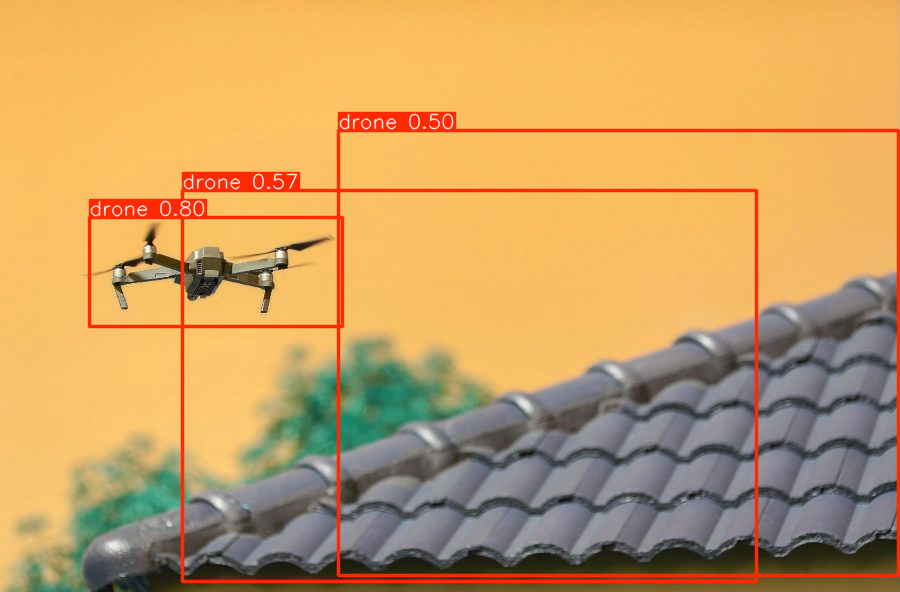

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0.], device='cuda:0')
conf: tensor([0.8030, 0.5750, 0.4981], device='cuda:0')
data: tensor([[8.9511e+01, 2.1712e+02, 3.4258e+02, 3.2696e+02, 8.0302e-01, 0.0000e+00],
        [1.8209e+02, 1.9015e+02, 7.5624e+02, 5.8136e+02, 5.7497e-01, 0.0000e+00],
        [3.3847e+02, 1.3040e+02, 8.9891e+02, 5.7557e+02, 4.9813e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (592, 900)
shape: torch.Size([3, 6])
xywh: tensor([[216.0468, 272.0388, 253.0723, 109.8441],
        [469.1647, 385.7513, 574.1577, 391.2119],
        [618.6896, 352.9834, 560.4415, 445.1658]], device='cuda:0')
xywhn: tensor([[0.2401, 0.4595, 0.2812, 0.1855],
        [0.5213, 0.6516, 0.6380, 0.6608],
        [0.6874, 0.5963, 0.6227, 0.7520]], device='cuda:0')
xyxy: tensor([[ 89.5107, 217.1167, 342.5830, 326.9608],
        [182.0859, 190.1454, 756.2436, 581.3572],
        [338.4688, 130.4005, 898.9103, 575.5663]], device='cuda:0')


In [ ]:
from google.colab import files
from IPython.display import Image, display
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train4/weights/best.pt')

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = list(uploaded.keys())[0]

# Perform inference on the uploaded image
results = model(image_filename)

# Display the image with detections
display(results[0].plot())  # Directly display the plotted image using display

# Print the results (bounding boxes, confidence scores, class names)
results[0].boxes

In [ ]:

model = YOLO('/content/runs/detect/train4/weights/best.pt')

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = list(uploaded.keys())[0]

# Perform inference on the uploaded image
results = model(image_filename)

# Display the image with detection
display(results[0].plot())  # Directly display the plotted image using display

# Print the results (bounding boxes, confidence scores, class names)
results[0].boxes

Saving drone-license-requirement-for-mavic-2-pro-and-m300-drone.jpg to drone-license-requirement-for-mavic-2-pro-and-m300-drone.jpg

image 1/1 /content/drone-license-requirement-for-mavic-2-pro-and-m300-drone.jpg: 672x1504 2 drones, 39.6ms
Speed: 6.5ms preprocess, 39.6ms inference, 1.5ms postprocess per image at shape (1, 3, 672, 1504)


array([[[209, 172, 138],
        [210, 173, 139],
        [211, 174, 140],
        ...,
        [216, 173, 140],
        [216, 173, 140],
        [215, 172, 139]],

       [[209, 172, 138],
        [210, 173, 139],
        [210, 173, 139],
        ...,
        [216, 173, 140],
        [216, 173, 140],
        [216, 173, 140]],

       [[210, 172, 138],
        [210, 172, 138],
        [211, 173, 139],
        ...,
        [216, 173, 140],
        [216, 173, 140],
        [216, 173, 140]],

       ...,

       [[  3,  13,   0],
        [ 36,  46,  29],
        [ 56,  66,  50],
        ...,
        [ 29,  65,  48],
        [ 11,  47,  30],
        [ 10,  46,  29]],

       [[ 24,  38,  20],
        [ 50,  64,  46],
        [ 60,  73,  57],
        ...,
        [ 25,  57,  40],
        [  1,  33,  16],
        [  0,  24,   7]],

       [[ 42,  58,  41],
        [ 39,  55,  38],
        [ 24,  39,  25],
        ...,
        [ 29,  59,  40],
        [  8,  38,  19],
        [ 10,  40,  21]]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.8196, 0.8018], device='cuda:0')
data: tensor([[573.1167, 110.3469, 778.2969, 206.9553,   0.8196,   0.0000],
        [150.4170, 176.4446, 235.1773, 216.7662,   0.8018,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (439, 1024)
shape: torch.Size([2, 6])
xywh: tensor([[675.7068, 158.6511, 205.1802,  96.6084],
        [192.7971, 196.6054,  84.7603,  40.3216]], device='cuda:0')
xywhn: tensor([[0.6599, 0.3614, 0.2004, 0.2201],
        [0.1883, 0.4478, 0.0828, 0.0918]], device='cuda:0')
xyxy: tensor([[573.1167, 110.3469, 778.2969, 206.9553],
        [150.4170, 176.4446, 235.1773, 216.7662]], device='cuda:0')
xyxyn: tensor([[0.5597, 0.2514, 0.7601, 0.4714],
        [0.1469, 0.4019, 0.2297, 0.4938]], device='cuda:0')

Saving Go_phytodron_NEIKER.png to Go_phytodron_NEIKER.png

image 1/1 /content/Go_phytodron_NEIKER.png: 960x1504 1 drone, 44.9ms
Speed: 8.6ms preprocess, 44.9ms inference, 1.8ms postprocess per image at shape (1, 3, 960, 1504)


array([[[226, 223, 218],
        [226, 223, 218],
        [226, 223, 218],
        ...,
        [226, 225, 227],
        [226, 225, 227],
        [226, 225, 227]],

       [[226, 223, 218],
        [226, 223, 218],
        [226, 223, 218],
        ...,
        [226, 225, 227],
        [226, 225, 227],
        [226, 225, 227]],

       [[226, 223, 218],
        [226, 223, 218],
        [226, 223, 218],
        ...,
        [226, 225, 227],
        [226, 225, 227],
        [226, 225, 227]],

       ...,

       [[ 33,  63,  73],
        [ 44,  69,  78],
        [ 42,  61,  69],
        ...,
        [ 17,  42,  56],
        [ 17,  44,  57],
        [ 17,  45,  58]],

       [[ 42,  76,  84],
        [ 34,  60,  68],
        [ 20,  40,  48],
        ...,
        [ 18,  44,  58],
        [ 15,  42,  56],
        [ 13,  41,  53]],

       [[ 45,  80,  89],
        [ 33,  59,  67],
        [ 23,  43,  50],
        ...,
        [ 20,  43,  59],
        [ 17,  41,  55],
        [ 17,  41,  53]]], dtype=uint8)
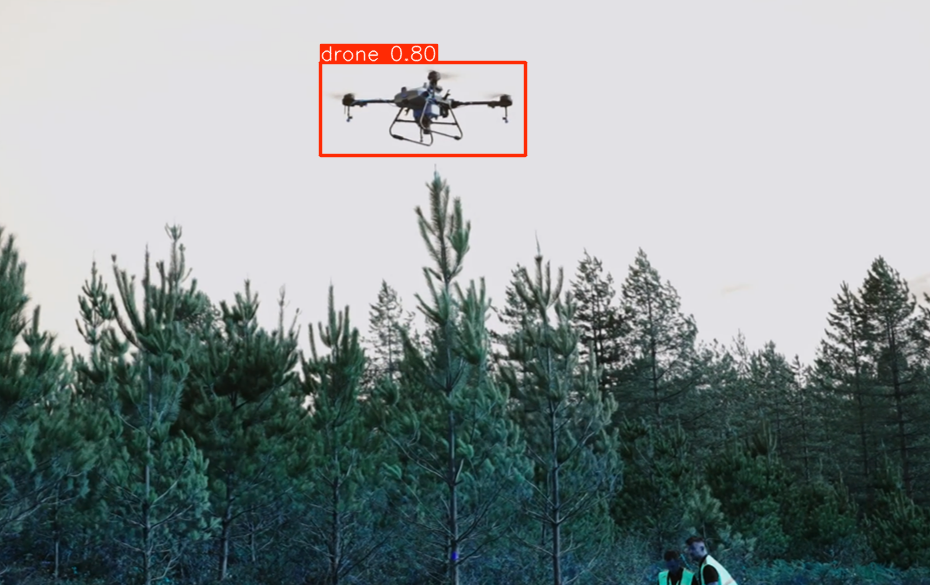

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8034], device='cuda:0')
data: tensor([[320.5396,  62.1085, 525.9067, 155.3083,   0.8034,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (585, 930)
shape: torch.Size([1, 6])
xywh: tensor([[423.2232, 108.7084, 205.3671,  93.1998]], device='cuda:0')
xywhn: tensor([[0.4551, 0.1858, 0.2208, 0.1593]], device='cuda:0')
xyxy: tensor([[320.5396,  62.1085, 525.9067, 155.3083]], device='cuda:0')
xyxyn: tensor([[0.3447, 0.1062, 0.5655, 0.2655]], device='cuda:0')

In [ ]:

model = YOLO('/content/runs/detect/train4/weights/best.pt')

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = list(uploaded.keys())[0]

# Perform inference on the uploaded image
results = model(image_filename)

# Display the image with detections
# results[0].plot() # This line is not needed anymore
# Image(filename=results[0].plot(), width=600) # This line caused the error
display(results[0].plot())  # Directly display the plotted image using display

# Print the results (bounding boxes, confidence scores, class names)
results[0].boxes